# K Means Clustering


O K-Means Clustering é um algoritmo de aprendizagem não supervisionado que tenta agrupar dados com base na sua similaridade. 

A aprendizagem não supervisionada significa que não há resultados a serem previstos e que o algoritmo apenas tenta encontrar padrões nos dados. 

No K means clustering temos de especificar o número de clusters nos quais os dados devem ser agrupados. O algoritmo atribui aleatoriamente cada observação a um cluster e encontra o centróide de cada cluster. Depois, o algoritmo itera através de duas etapas:

- Reatribui pontos ao cluster cujo centroide é o mais próximo;
- Calcula o novo centróide de cada cluster. 

Estes dois passos são repetidos até que a variação dentro do cluster não possa ser mais reduzida.

## Referências
- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans
- https://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods
- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

## Importar bibliotecas 

In [160]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## Criar os Dados através da função make_blobs 

In [161]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

X, Y = make_blobs(n_samples=200, centers=4, n_features=2, cluster_std=1.8, random_state=101)

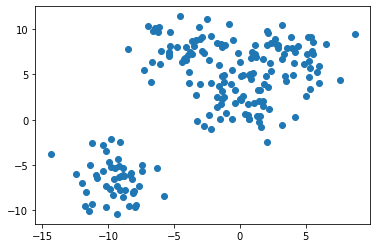

In [162]:
plt.scatter(X[:,0], X[:,1])

## Verificar o número ótimo de clusters 

In [163]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=101)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


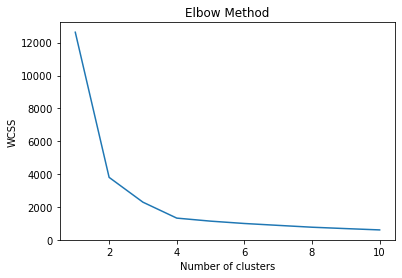

In [164]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Criar os Clusters 

In [165]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=500, n_init=10, random_state=101)
kmeans.fit(X)
# ou
# kmeans.fit_predict(X)
# para visualizar o array com a classificação

KMeans(max_iter=500, n_clusters=4, random_state=101)

In [166]:
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [167]:
kmeans.labels_

array([2, 1, 3, 1, 1, 0, 1, 3, 1, 3, 2, 3, 1, 1, 2, 3, 1, 3, 0, 2, 0, 3,
       3, 0, 2, 0, 0, 3, 1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 0, 3, 0, 2, 2, 2,
       3, 1, 2, 3, 0, 3, 3, 2, 1, 3, 0, 2, 3, 3, 2, 1, 0, 1, 0, 2, 1, 3,
       0, 1, 1, 0, 1, 3, 0, 3, 0, 1, 1, 3, 2, 3, 3, 0, 1, 0, 3, 3, 3, 2,
       3, 0, 0, 0, 0, 3, 3, 0, 1, 2, 0, 1, 3, 0, 3, 3, 1, 3, 0, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1, 2, 3, 0, 2, 2, 2,
       3, 0, 0, 2, 1, 2, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 2, 2, 2, 3, 1,
       3, 2, 1, 1, 1, 3, 1, 3, 3, 2, 0, 2, 3, 1, 2, 3, 1, 3, 2, 1, 3, 2,
       1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 1, 1,
       0, 3])

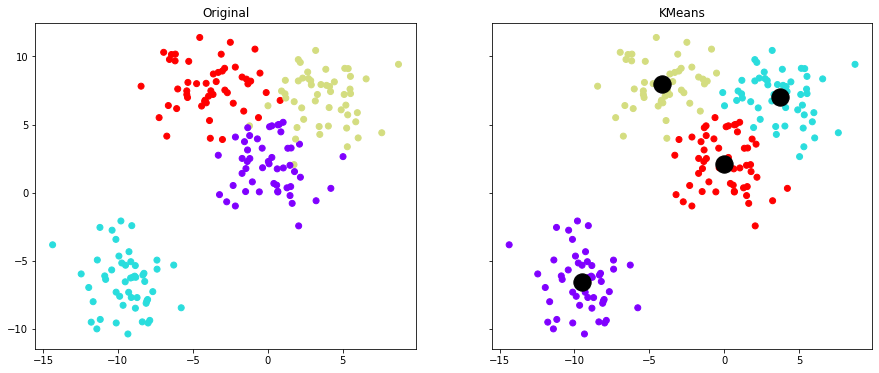

In [168]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,6))
ax1.set_title('Original')
ax1.scatter(X[:,0], X[:,1], c=Y, cmap='rainbow')

ax2.set_title('KMeans')
ax2.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
